<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Python for Visualisation and EDA - Week 2</center></h1>


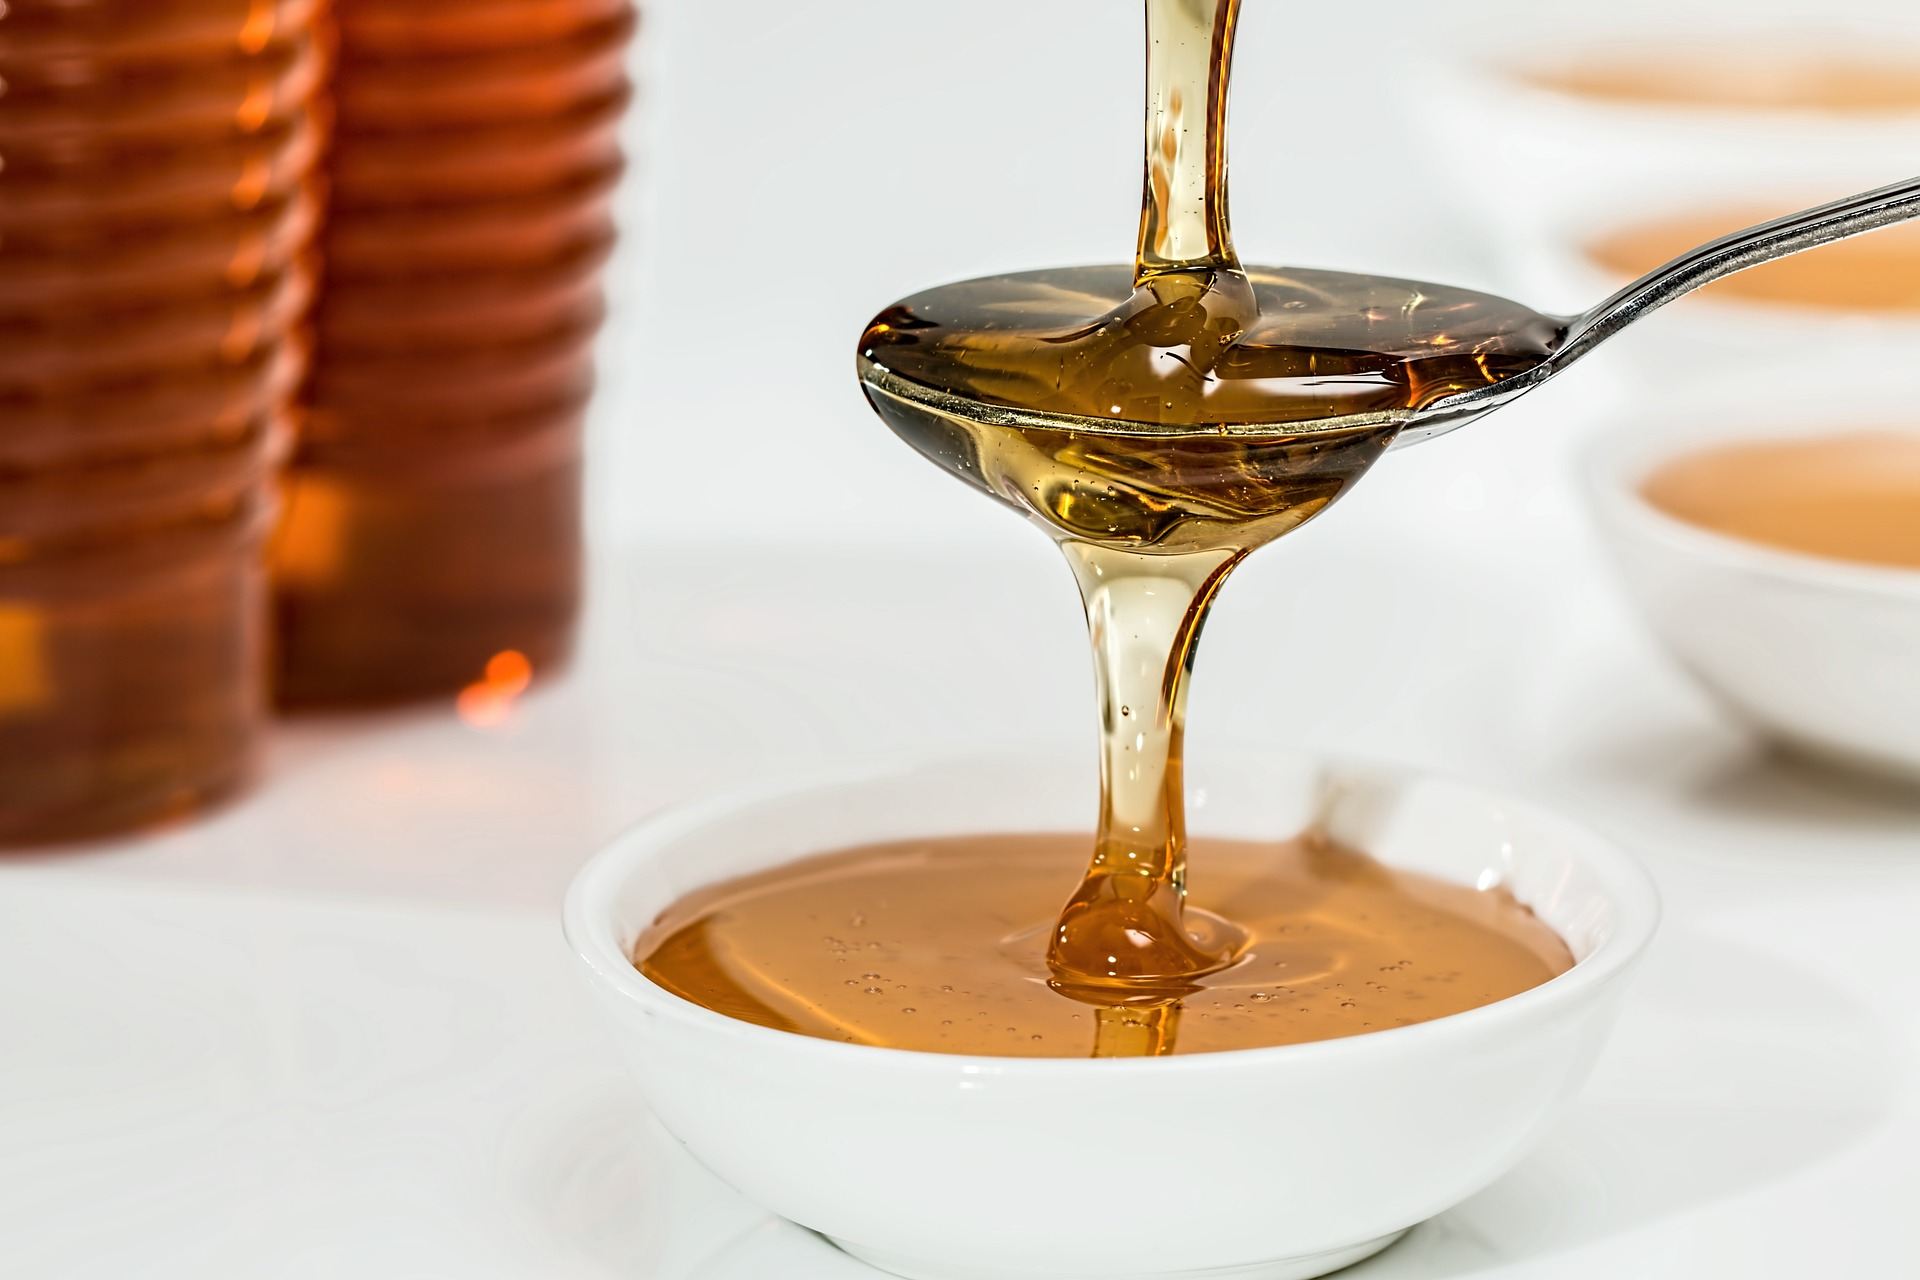



<b><h2><center>Honey Production Case Study</center></h2></b>

# Background
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees that causes the remaining hive colonies to collapse. Speculation on the cause of this disorder points to hive diseases and pesticides harming the pollinators, tho no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Nowadays, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# Objective: 
To visualize how honey production has changed in the United States. 

Key questions to be answered:

* How has honey production yield changed over the years from 1998 to 2016?
* Over time, what have been the major production trends across the states?
* Are there any pattern that can be observed between total honey production and the value of production every year? How has the value of production that could be tied to demand, changed every year?

# Dataset:

* **State**: Various states in the U.S.
* **year**: Year of production
* **stocks**: Refers to stocks held by producers. Unit is pounds
* **numcol**: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* **yieldpercol**: honey yield per colony. The unit is in pounds
* **totalprod**: Total production (numcol x yieldpercol). Unit is pounds
* **priceperlb**: Refers to average price per pound based on expanded sales. The unit is dollars.
* **prodvalue**: Value of production (totalprod x priceperlb). The unit is dollars.


Let's start by importing necessary libraries

## **Importing the necessary packages** 

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

## **Reading the datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
honeyprod = pd.read_csv("/content/honeyproduction1998-2016.csv")

## **Data Overview**

Let's start by performing basic steps to understand the data such as:
- observing the first few rows of the dataset
- getting information about the number of rows and columns 
- finding out the data types of the columns 
- checking the statistical summary 

### Displaying the first few rows of the dataset

In [ ]:
honeyprod.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.00,71,1136000.00,159000.00,0.72,818000.00,1998
1,Arizona,55000.00,60,3300000.00,1485000.00,0.64,2112000.00,1998
2,Arkansas,53000.00,65,3445000.00,1688000.00,0.59,2033000.00,1998
3,California,450000.00,83,37350000.00,12326000.00,0.62,23157000.00,1998
4,Colorado,27000.00,72,1944000.00,1594000.00,0.70,1361000.00,1998


The dataset has been loaded properly
- *Dataset consists of several columns displaying the various attributes related to production*
- *Most of the columns are numerical in nature*

### Understanding the shape of the user dataset

In [ ]:
honeyprod.shape

(785, 8)

- *The Dataset has 785 number of rows with 8 columns*

### Checking the datatype of the columns

In [ ]:
honeyprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


- *There is only one object datatype column with 7 numerical datatypes*
- *All the columns have 785 observations, which means none of the columns has null values*



### Getting the statistical summary for the dataset

In [ ]:
honeyprod.describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,785.00,61686.62,92748.94,2000.00,9000.00,26000.00,65000.00,510000.00
yieldpercol,785.00,60.58,19.43,19.00,46.00,58.00,72.00,136.00
totalprod,785.00,4140956.69,6884593.86,84000.00,470000.00,1500000.00,4096000.00,46410000.00
stocks,785.00,1257629.30,2211793.82,8000.00,119000.00,391000.00,1380000.00,13800000.00
priceperlb,785.00,1.70,0.93,0.49,1.05,1.48,2.04,7.09
prodvalue,785.00,5489738.85,9425393.88,162000.00,901000.00,2112000.00,5559000.00,83859000.00
year,785.00,2006.82,5.49,1998.00,2002.00,2007.00,2012.00,2016.00


- *The number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000*
- *The average number of colonies is close to the 75% percentile of the data, indicating a right skew*
- *As expected, the standard deviation of numcol columns is very high*
- *Yield per colony also has a huge spread ranging from 19 pounds to 136 pounds, but the average value is close to the median of the data, which means the data is evenly distributed across this column*
- *In fact, all the variables seem to have a huge range, we will have to investigate further if this spread is mainly across different states or varies in the same state over the years*


Since we have mostly numerical variables, let's check the distribution of each variable using Visualisation to understand nature of data 

## Let's look at the spread of number of honey-producing colonies.

Let's create a histogram and a boxplot to see the distribution of the variable 'numcol'-

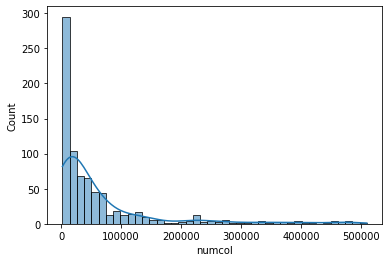

In [ ]:
#creating a histogram
sns.histplot(data = honeyprod, x = 'numcol', kde = True);

It is clear from the above plot of 'numcol', that data distribution is extremely right-skewed, which means, the average number of honey-producing colonies ranges between 0 - 10,0000. <br>
But what about the values that are lying right to the distribution? To know more about these values, we need to create a boxplot -


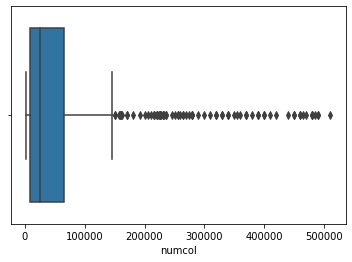

In [ ]:
# creating a boxplot
sns.boxplot(data = honeyprod, x = 'numcol');

So, it is evident from the above boxplot that the 'numcol' contains a lot of outliers.

Observations: 
- *Most of the data is concentrated within the range of 0-50000, which means most of the states have around 50000 which are producing honey*
- *The distribution is right-skewed with a lot of outliers towards the higher end*
- *The median honey-producing colonies is nearly 25000*

We have seen how two different plots for one variable give us more insight into the data. Now, let's create a function so that multiple plots of a single variable can be shown at once  -

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

Using this function, we will explorate some of the numerical variables -

## Let's look at the spread of yield per colony

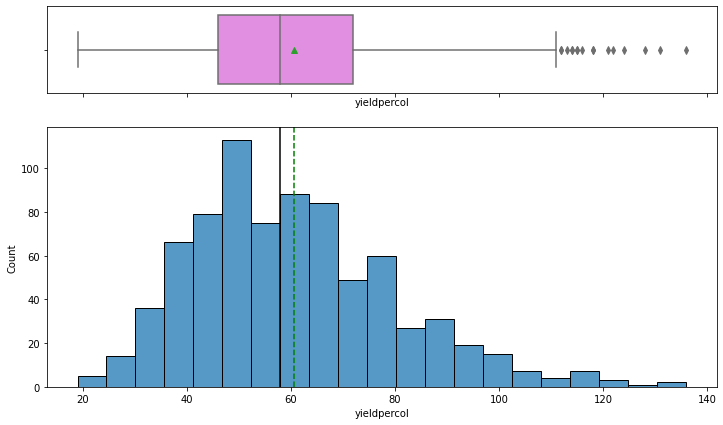

In [ ]:
histogram_boxplot(honeyprod,'yieldpercol')

*Observations:*
- *Distribution looks like almost evenly distributed with little skewness*
- *Yield per colony of honey has a **right-skewed** distribution with some outliers towards the higher end*
- *The median yield per colony is close to **60 pounds**.*

## Let's look at the distribution of cost of honey per pound

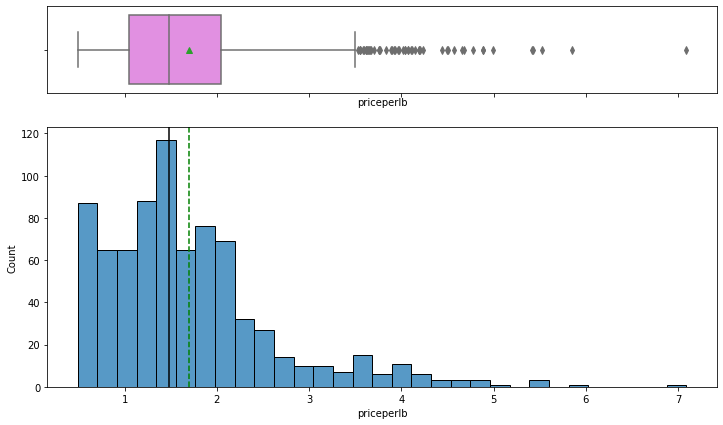

In [ ]:
histogram_boxplot(honeyprod,'priceperlb')

*Observations:*
- *Most of the honey is priced between 0-2 dollars*
- *Price per pound of honey has a right-skewed distribution with a lot of outliers towards the higher end*
- *The median price per pound of honey is 1.5 dollars*

The plots created in seaborn are very useful, but not that interactive. To create some for interactive graphs, we can use plotly -

In [ ]:
# let's start by installing plotly
!pip install plotly

In [ ]:
# importing plotly
import plotly.express as px

##Let's look at the distribution of value of production.

In [ ]:
fig = px.box(honeyprod, x = "prodvalue")
fig.show()

*Observations:*
- *Production value has a right-skewed distribution with a lot of outliers towards the higher end*
- *The median production value is 2.112M dollars* 
- *25% of the production value lies below 900.25k dollars*
- *The maximum production value is: 83.859M dollars*

## Let us look at the distribution of stocks held by producers.

In [ ]:
fig = px.box(honeyprod, x = "stocks",title="Boxplot: Stocks held by Producers",template="simple_white") # 'template' helps us to set the background
fig.show()

*Observations:*
- *Stocks held by producers also have a right-skewed distribution with a lot of outliers towards the higher end.*
- *The median value of stocks held by producers is close to 118.5k lbs*
- *The data ranges from 8000 lbs to 13.8M lbs which implies that the dispersion is very high in the data. In simple terms, the data of stocks held by producers is highly scattered.*

## Let's try to visualise how these numerical variables are associated with each other

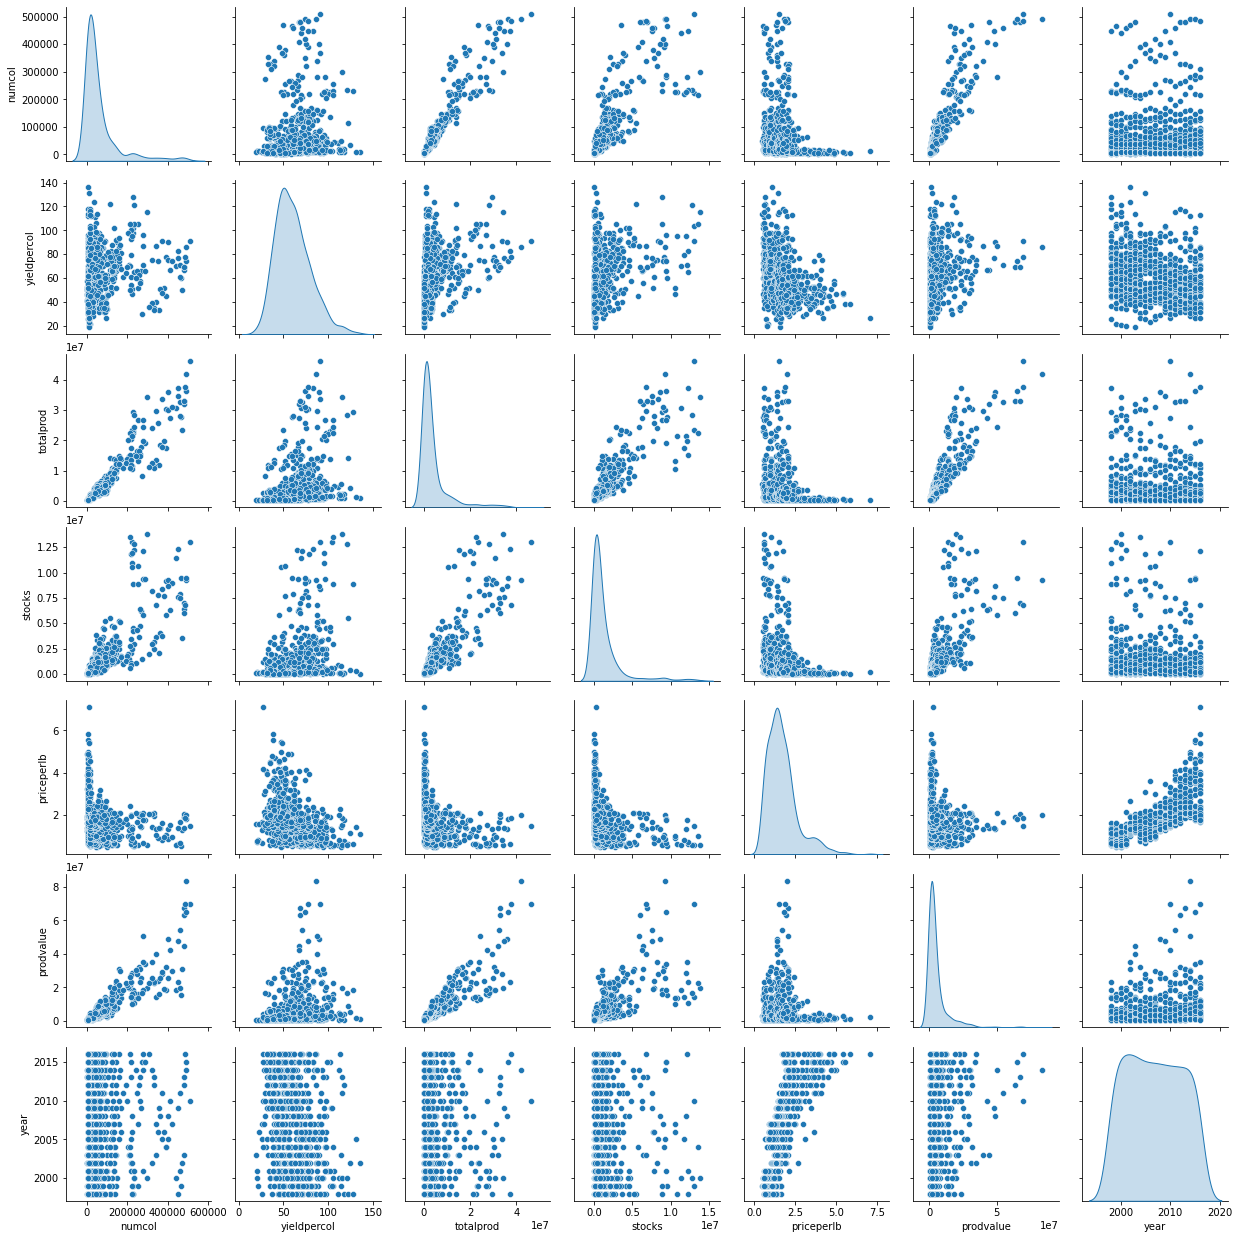

In [ ]:
# Plotting pairplot
sns.pairplot(honeyprod, diag_kind="kde");

In [ ]:
# creating a 2-D Matrix with correlation plots
correlation = honeyprod.corr() 
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.00,0.22,0.95,0.82,-0.21,0.90,0.03
yieldpercol,0.22,1.00,0.38,0.36,-0.36,0.26,-0.25
totalprod,0.95,0.38,1.00,0.88,-0.24,0.90,-0.04
stocks,0.82,0.36,0.88,1.00,-0.28,0.71,-0.12
priceperlb,-0.21,-0.36,-0.24,-0.28,1.00,-0.06,0.73
prodvalue,0.90,0.26,0.90,0.71,-0.06,1.00,0.19
year,0.03,-0.25,-0.04,-0.12,0.73,0.19,1.00


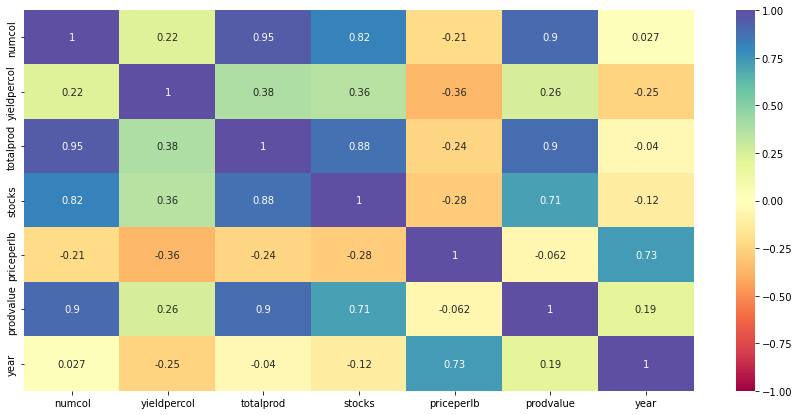

In [ ]:
# Plotting Heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, vmin = -1, vmax = 1, annot=True, cmap="Spectral");

*Observations:*
- *Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other*
- *Yield per colony does not have a high correlation with any of the features that we have in our dataset* 
- *Same is the case with priceperlb*
- *Determining the factors influencing per colony yield and price per pound of honey would need further investigation*  

Similarly, we can explore the other two variables as well i.e. `state` and `year` columns

## Let's try to visualise trends in columns `state` and `year`

Let's check which states are producing honey 

In [ ]:
honeyprod['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [ ]:
honeyprod['state'].nunique()

44

So, 44 states are producing honey in total.

### Let's extract which states have maximum and minimum honey production

In [ ]:
#top 10 states producing maximum honey
top10_totalprod= honeyprod.groupby('state').sum()[['totalprod']].sort_values('totalprod', ascending=False).reset_index().head(10) 
top10_totalprod

,state,totalprod
0,North Dakota,624435000.00
1,California,390315000.00
2,South Dakota,344361000.00
3,Florida,297798000.00
4,Montana,210125000.00
5,Minnesota,175432000.00
6,Texas,137832000.00
7,Wisconsin,95067000.00
8,Michigan,93788000.00
9,Idaho,78362000.00


We have extracted the total honey production for top 10 states. To make the presentation of the above values better let's make use of the barplot.

In the barplot, we will try to add the values of total production on top of each bar. To do so, we will be using a 'for' loop and 'patches'. <br>

**What are pacthes?** 

In seaborn, every bar and its corresponding background area is known as a **patch** within the bar chart object. To print the values of each bar - 

*   We will create a barplot and save it in a variable.
*   Then, using a for loop, we will iterate over every patch.
*   For every patch, we will add the total value using the'**.annotate**' function, which takes the following inputs - 
  *   'get_hight' and 'get_width' help us to get the height and width of a barplot so that the position of the value can be decided
  *   'ha' and 'va' decides the horizontal and vertical alignment of the text. We want them to add at the center of the top of a barchart.
  *   'size' helps us to format the size of the text.
  * 'xytext' and 'textcoords' help us to set the coordinates of the text.

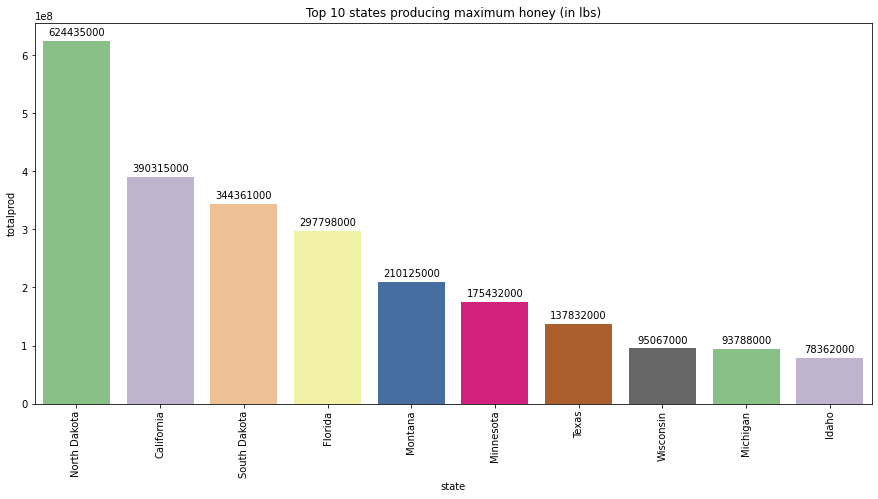

In [ ]:
# Plotting Bar graph
plt.figure(figsize=(15,7))
ax = sns.barplot(data=top10_totalprod,x = 'state', y='totalprod', palette = 'Accent');
plt.title('Top 10 states producing maximum honey (in lbs)')
# Print count on top of the bar
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90);

Similarly, we can create a barplot the bottom 10 states -

In [ ]:
#last 10 states producing minimum honey
bottom10_totalprod= honeyprod.groupby('state').sum()[['totalprod']].sort_values('totalprod', ascending=False).reset_index().tail(10) 
bottom10_totalprod

,state,totalprod
34,New Mexico,7147000.00
35,Vermont,6720000.00
36,West Virginia,5615000.00
37,Maine,5256000.00
38,Virginia,4837000.00
39,Nevada,4832000.00
40,Kentucky,4263000.00
41,South Carolina,3174000.00
42,Maryland,1266000.00
43,Oklahoma,1207000.00


We have extracted the total honey production for bottom 10 states. Similarly let's represent these values using a barplot.

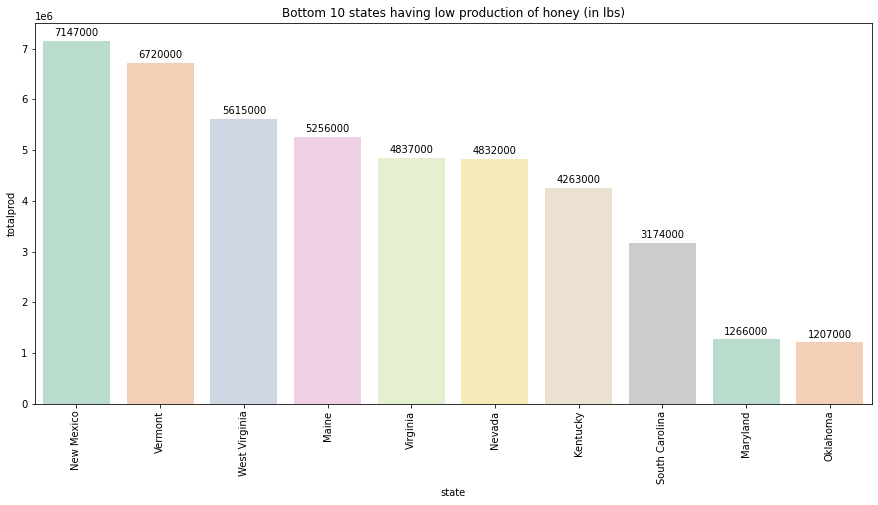

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=bottom10_totalprod,x = 'state', y='totalprod', palette = 'Pastel2');
plt.title('Bottom 10 states having low production of honey (in lbs)')
for bar in ax.patches: # Print count on top of the bar
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90);

*Observations:*
- *North Dakota is producing the maximum amount of honey followed by California and South Dakota as compared to other states*
- *Oklahoma is producing the least amount of honey in total followed by Maryland and South California*

### Similarly we can check the which state is producing costliest and cheapest honey on an average basis

In [ ]:
#top 10 states having maximum price per pound based on expanded sales
top10_price= honeyprod.groupby('state').sum()[['priceperlb']].sort_values('priceperlb', ascending=False).reset_index().head(10) 
top10_price

,state,priceperlb
0,Virginia,55.36
1,Illinois,50.47
2,North Carolina,47.56
3,Kentucky,46.51
4,Tennessee,44.64
5,West Virginia,43.61
6,New Jersey,41.25
7,Vermont,40.43
8,Maine,38.42
9,Ohio,38.26


Virginia is producing the costliest honey on an average basis. Let's create a barplot using plotly and add a line indicating the overall mean of the price per pounds of honey to get a better representation.

In [ ]:
#Creating a bar chart using plotly to show the top 10 states
fig = px.bar(top10_price, x="state", y="priceperlb", 
                   title ="State wise average price per pound based on expanded sales (in dollars)",
                   width = 800, height = 400,
                   template="simple_white")
fig.show()

Now, let's add a line to it which will indicate the mean value of price per lb using the Plotly function fig.add_shape(). The function will take the following inputs- 
  * type - Type of the shape
  * 'line_color', 'line_width', and 'line_dash' will help us to style the line to be added to the plot
  * 'x0' and 'x1' will set the x -coordinates for the line using x0 and x1. 
  * 'xref = 'paper' refers to the distance from the left of the plotting area in normalized coordinates where "0" corresponds to the left and "1" corresponds to the right.
  * 'total.proceperlb.mean( )' calculates the mean value of the price per pound of honey produced by every state. 
  *  y0 and y1 denote the y-coordinate of the line.





In [ ]:
#computing the total price per lb by state using which we will compute the mean
total = honeyprod.groupby('state')['priceperlb'].sum().reset_index()

#add a horizontal line indicating mean price per lb value 
fig.add_shape(
    type="line", line_color="salmon", line_width=3, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=total.priceperlb.mean(), y1=total.priceperlb.mean()
    )
fig.show()

* Across the US priceperlb of honey is 30 and all the above states are producing the honey at higher price than the average value.
* The east region or the southern states of the US have high price of honey.

similarly, let's create another plot for the bottom 10 states.

In [ ]:
#Last 10 states having minimum price per pound of honey based on expanded sales
bottom10_price= honeyprod.groupby('state').sum()[['priceperlb']].sort_values('priceperlb', ascending=False).reset_index().tail(10) 
bottom10_price

,state,priceperlb
34,South Dakota,24.80
35,North Dakota,24.56
36,Nevada,24.41
37,Arkansas,24.35
38,Mississippi,23.88
39,Louisiana,23.77
40,New Mexico,19.77
41,South Carolina,16.57
42,Maryland,9.37
43,Oklahoma,8.74


Let's do a representation for bottom 10 states of the US

In [ ]:
fig = px.bar(bottom10_price, x="state", y="priceperlb", 
                   title ="Bottom 10 states: Average price per pound of honey (in dollars)",
                   width = 800, height = 400,
                   template="simple_white")

fig.add_shape(
    type="line", line_color="salmon", line_width=3,line_dash="dot",
    x0=0, x1=1, xref="paper", y0=total.priceperlb.mean(), y1=total.priceperlb.mean()
    )
fig.show()

*Observations:*
- Virginia is producing the costliest honey followed by Illinois and North Carolina as compared to other states*
- On average Oklahoma is producing the cheapest honey across US followed by Maryland and South Carolina*

Since we have explored various attributes present in the dataset, now let's try to answer the key questions to check the trend across the years. 

## Let's look at the overall trend of honey production in the US over the years

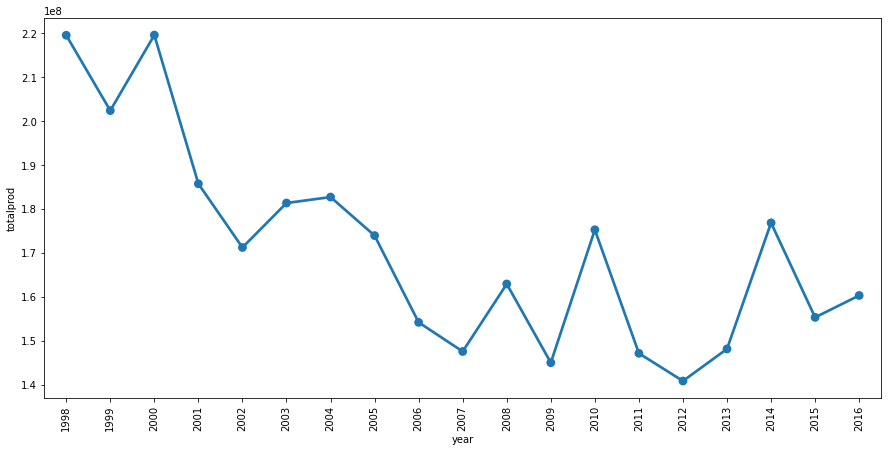

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90);

*Observations:*
- *The overall honey production in the US has been decreasing over the years*
- *Total honey production = number of colonies * average yield per colony. Let's check if the honey production is decreasing due to one of these factors or both*

## Variation in the number of colonies over the years 

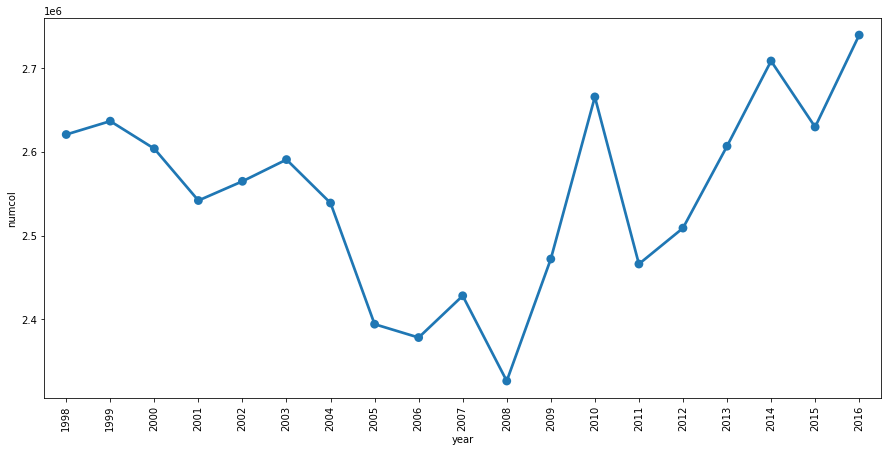

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='numcol', data=honeyprod, ci=None, estimator=sum)
plt.xticks(rotation=90);

*Observations:*
- *The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick after 2008*
- *It is possible that there was some intervention in 2008 that help in increasing the number of honey bee colonies across the country*

## Variation of yield per colony over the years 

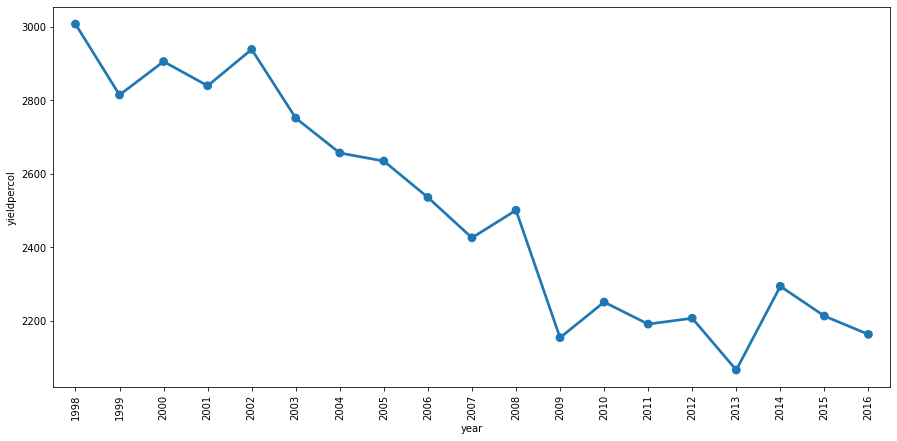

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90);

*Observations:*
- *In contrast to the number of colonies, the yield per colony has been decreasing since 1998*
- *This indicates that it is not the number of colonies that is causing a decline in total honey production but the yield per colony*

## Let' s look at the production trend at state level

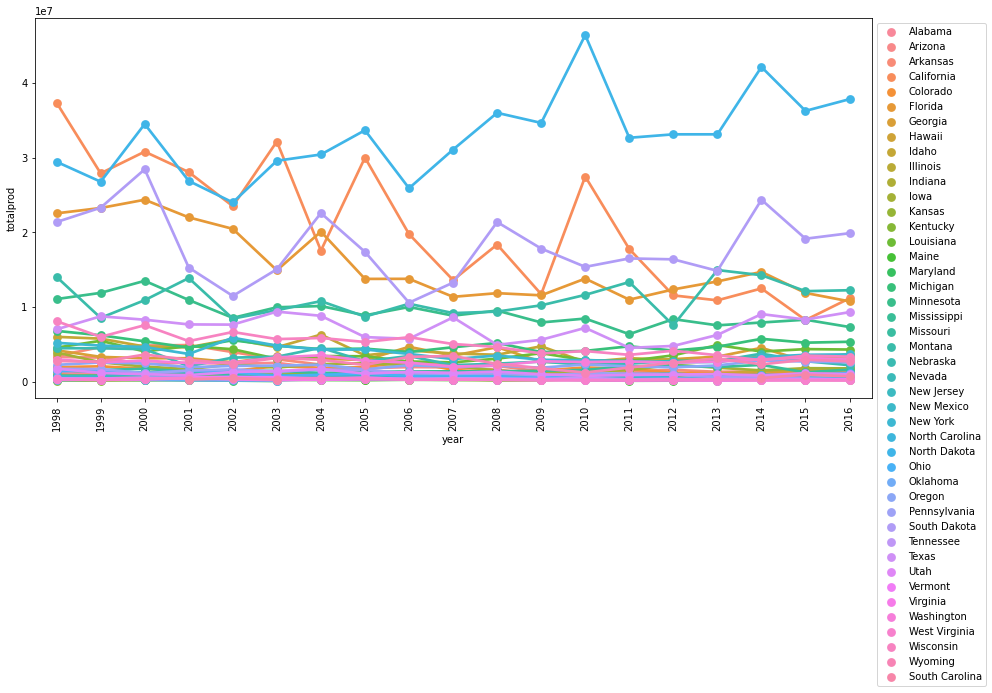

In [ ]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90);

*Observations:*
- *some states have much higher productions than the others but this plot is a little hard to read*

Let's try plotting each state separately for a better understanding -

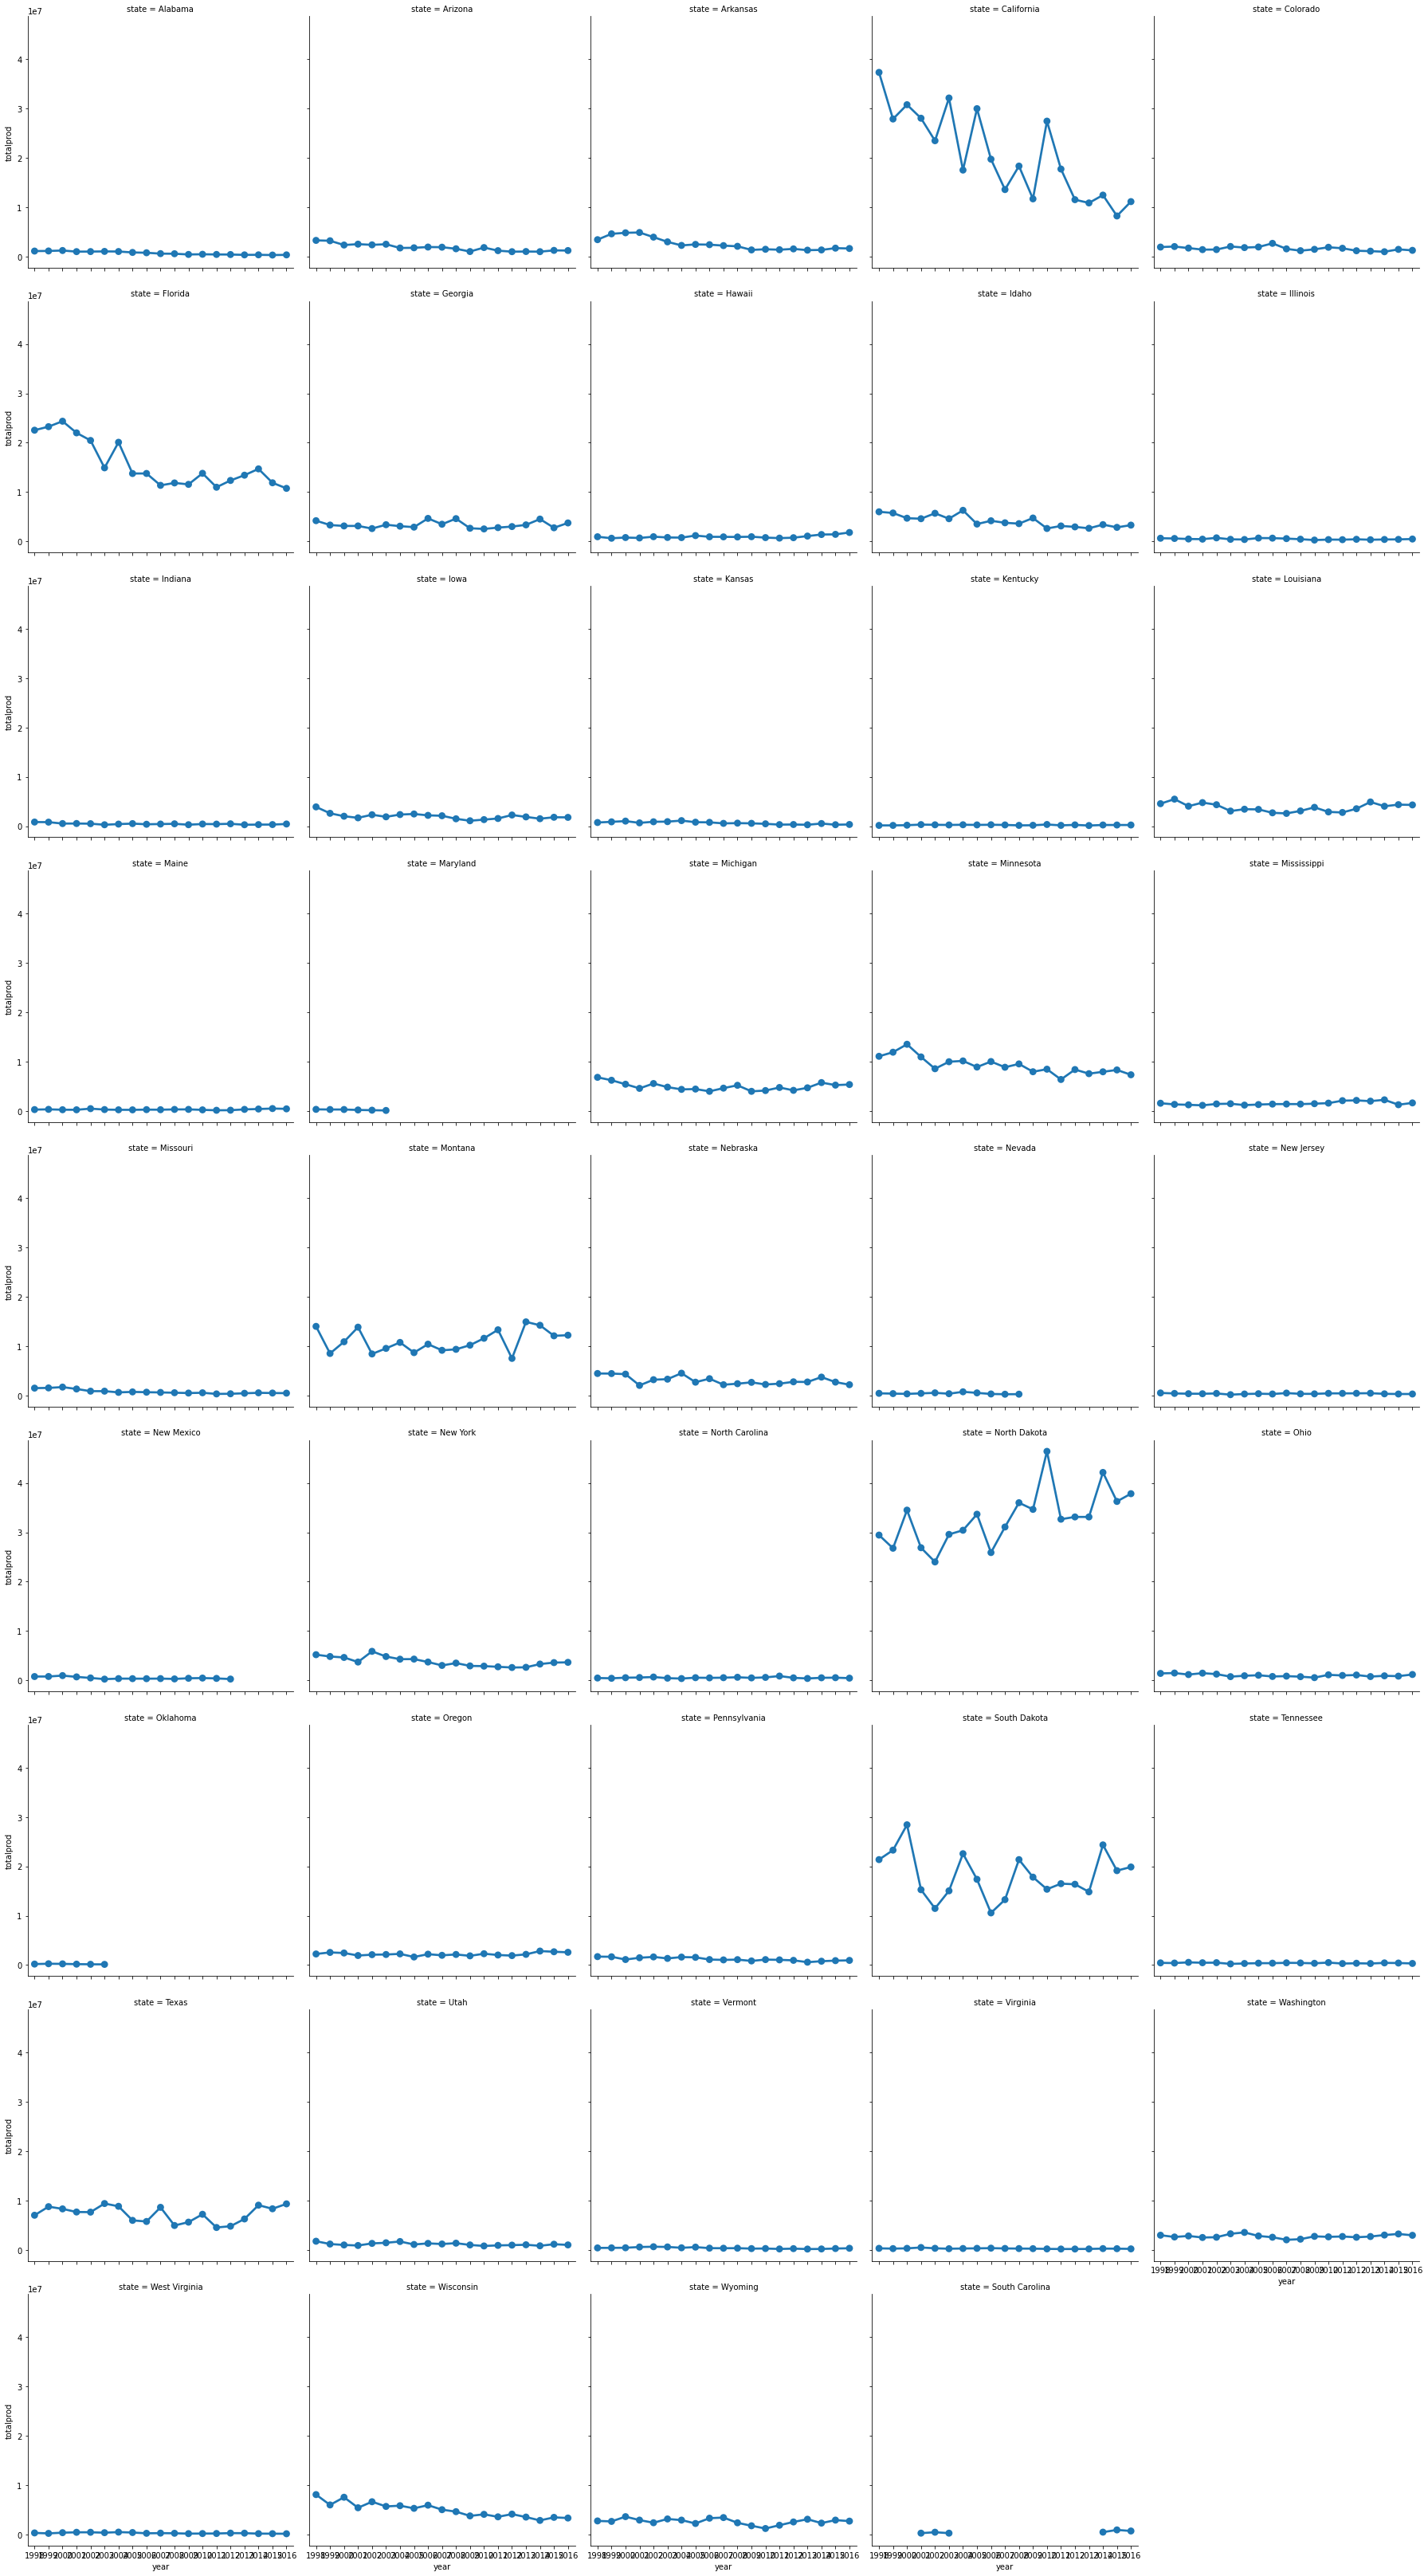

In [ ]:
sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
              col_wrap = 5);

*Observations:*
- *The most prominent honey-producing states of the US are - California, Florida, North Dakota and South Dakota and Montana*
- *Unfortunately, honey production in California has seen a steep decline over the years*
- *Florida's total production also has been on a decline* 
- *South Dakota has more or less maintained its levels of production*
- *North Dakota has actually seen an impressive increase in the honey production* 

## Let's look at the yearly trend in number of colonies and yield per colony in the 5 prominent states 

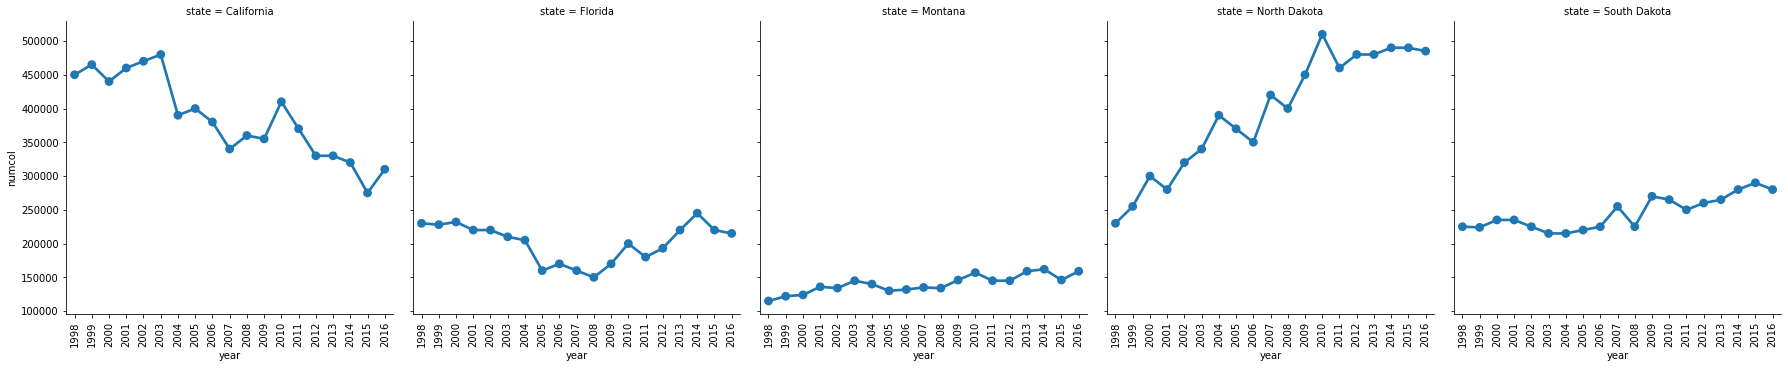

In [ ]:
cplot1=sns.catplot(x='year', y='numcol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                col_wrap = 5)
cplot1.set_xticklabels(rotation=90);

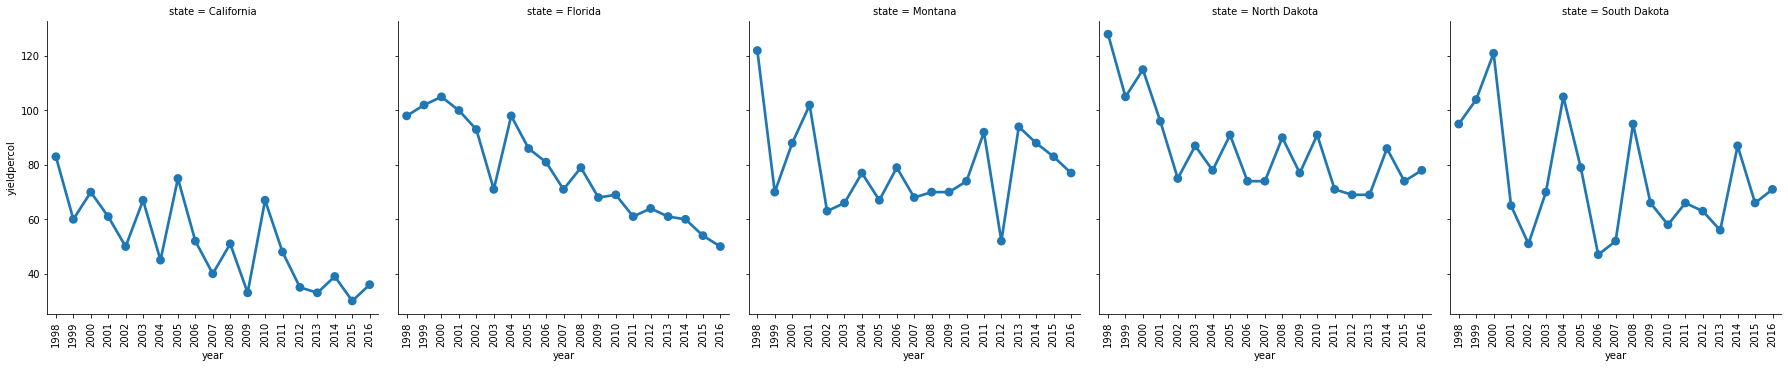

In [ ]:
cplot2=sns.catplot(x='year', y='yieldpercol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                col_wrap = 5)
cplot2.set_xticklabels(rotation=90);

*Observations:*
- *In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states*
- *If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years*

## Let us see what effect, the declining production trend has on the value of production 

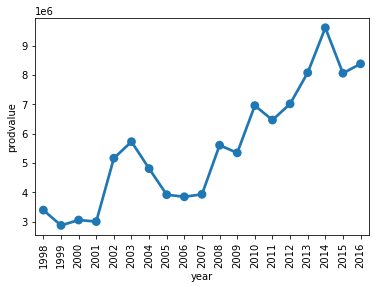

In [ ]:
sns.pointplot(x="year", y="prodvalue", data=honeyprod, ci=None)
plt.xticks(rotation=90);

*Observations:*
- *This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time*
- *As the supply declined, the demand has added to the value of honey*

## Let's check which of the states have been capitalising on this trend. We can compare the total production with the stocks held by the producers.

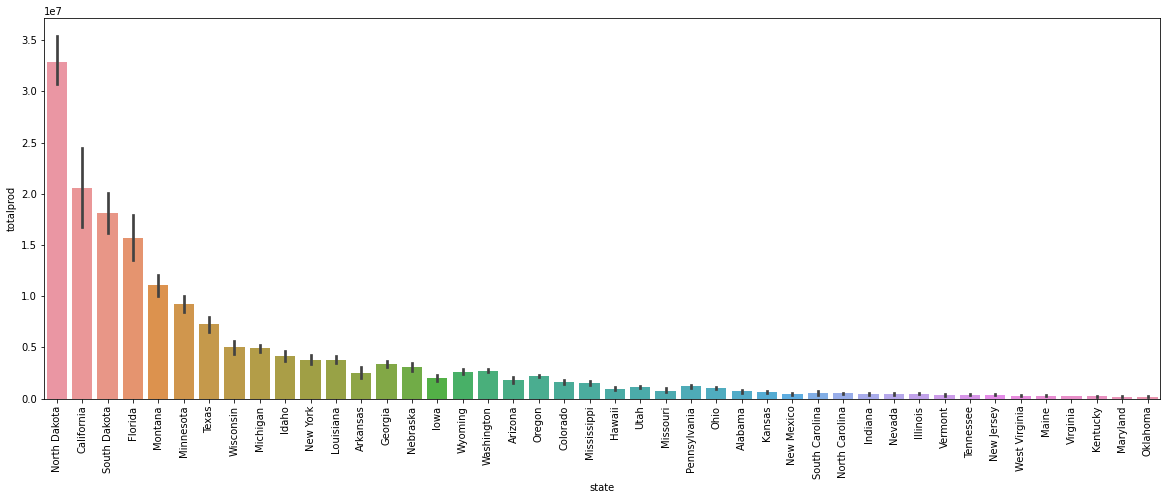

In [ ]:
plt.figure(figsize = (20,7)) # To resize the plot
# Plot total production per state
sns.barplot(x="state", y="totalprod", data=honeyprod.sort_values("totalprod", ascending=False))
plt.xticks(rotation=90);

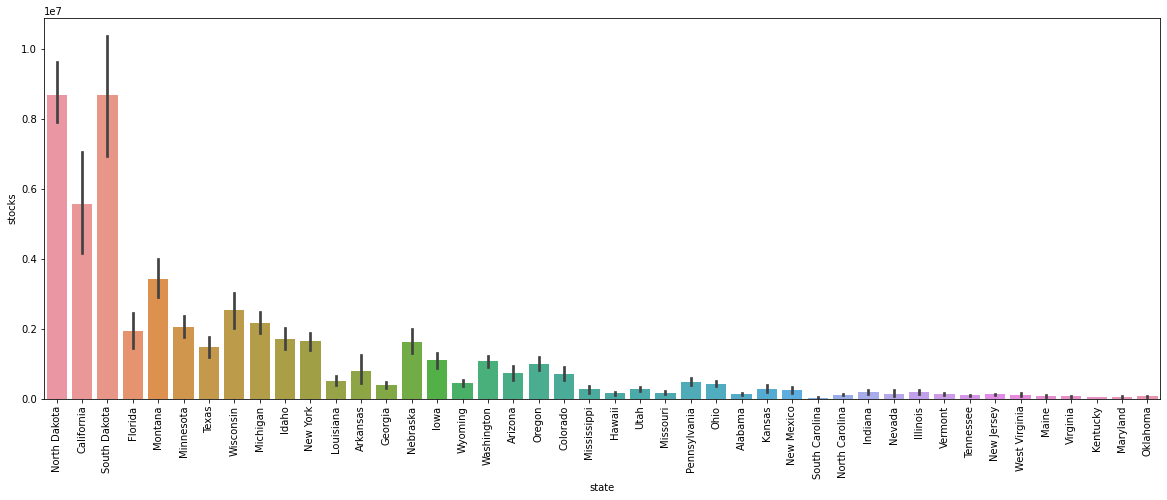

In [ ]:
plt.figure(figsize = (20,7)) # To resize the plot
# Plot stocks per state
sns.barplot(x="state", y="stocks", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Stocks")

plt.xticks(rotation=90);

*Observations:*
- *North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value*
- *Florida has the highest efficiency among the major honey-producing states*
- *Michigan is more efficient than Wisconsin in selling honey*

## Let's look at the average price per pound of honey across states

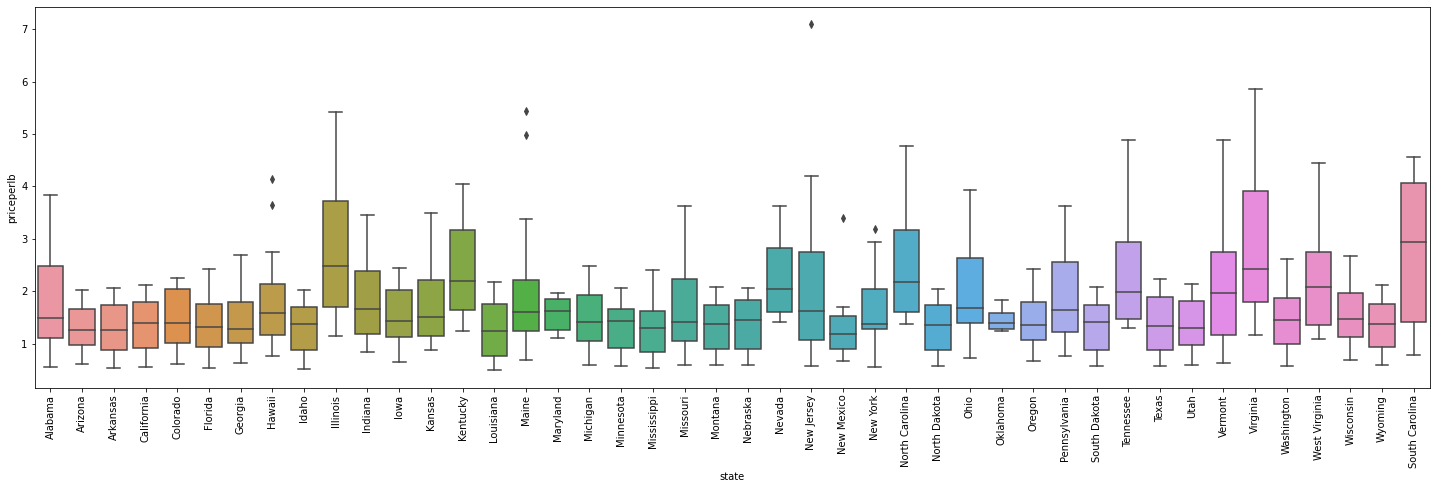

In [ ]:
plt.figure(figsize=(25, 7)) # To resize the plot
sns.boxplot(data = honeyprod, x = "state", y = "priceperlb")
plt.xticks(rotation=90);

*Observations:*
- *Virginia has the highest price per pound of honey*
- *The average price per pound of honey in the major honey-producing states is towards the lower end*

## Conclusion



* *We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased*
* *The reason for the declined honey production is the decrease in the yield per colony over the years*
* *The major honey-producing states are California, Florida, North Dakota, South Dakota and Montana* 
* *Among these, Florida has been very efficient in selling honey*

In this session, we have learned how to use different type of visualizations to extract actionable insights which makes it easier to identify trends, patterns, and outliers within large data sets. However, relying on customizations, libraries and different visuals isn't always necessary. Our goal is to formulate a story that consists insights and business recommendations and can be used by any organization to take data driven decisions. 

# Happy Learning !

---